## Kaggle ML2
## Matteo A. D'Alessandro, Carlo A. Patti

For basic statistics and visualizations check the profile_report.html file in ../assets

The study area includes four wilderness areas located in the Roosevelt National Forest of Northern Colorado. Each observation is a 30m x 30m patch. There are seven forest cover types:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

# Data Fields
- **Elevation** elevation in meters
- **Aspect** aspect in degrees azimuth
- **Slope** slope in degrees
- **Horizontal_Distance_To_Hydrology** Horz dist to nearest surface water features
- **Vertical_Distance_To_Hydrology** Vert dist to nearest surface water features
- **Horizontal_Distance_To_Roadways** Horz dist to nearest roadway
- **Hillshade_9am** (0 to 255 index) hillshade index at 9am, summer solstice
- **Hillshade_Noon** (0 to 255 index) hillshade index at noon, summer solstice
- **Hillshade_3pm** (0 to 255 index) hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points** Horz dist to nearest wildfire ignition points
- **Wilderness_Area** (4 binary cols, 0=abs or 1=pres) wilderness area designation
- **Soil_Type** (40 binary cols, 0=abs or 1=pres) soil type designation
- **Cover_Type** (7 types) forest cover type designation

The wilderness areas are:
1. Rawah
2. Neota
3. Comanche Peak
4. Cache la Poudre

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from ydata_profiling import ProfileReport
import plotly.express as px

sys.path.append('../../src')
from dataloader import *

%reload_ext autoreload
%autoreload 2

plots_theme = "plotly_dark"

In [3]:
df = load_train_df(
    PATH = '../../data',
    decode_dummies=False
)

In [4]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2881.0   130.0   22.0                             210.0   
1     3005.0   351.0   14.0                             242.0   
2     3226.0    63.0   14.0                             618.0   
3     3298.0   317.0    8.0                             661.0   
4     3080.0    35.0    6.0                             175.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                            54.0                           1020.0   
1                           -16.0                           1371.0   
2                             2.0                           1092.0   
3                            60.0                            752.0   
4                            26.0                           3705.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          250.0           221.0           88.0   
1          194.0           215.0          159.0   
2          232.0           210.0          107.0   
3          198.0           233.0          174.0   
4          219.0           227.0          144.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                               342.0  ...          0.0          0.0   
1                               842.0  ...          0.0          0.0   
2                              2018.0  ...          0.0          0.0   
3                              1248.0  ...          0.0          0.0   
4                              2673.0  ...          0.0          0.0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type39  Soil_Type40  Cover_Type  
0          0.0          0.0           1  
1          0.0          0.0           1  
2          0.0          0.0           1  
3          0.0          0.0           1  
4          0.0          0.0           1  

[5 rows x 55 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Elevation                           15120 non-null  float64 
 1   Aspect                              15120 non-null  float64 
 2   Slope                               15120 non-null  float64 
 3   Horizontal_Distance_To_Hydrology    15120 non-null  float64 
 4   Vertical_Distance_To_Hydrology      15120 non-null  float64 
 5   Horizontal_Distance_To_Roadways     15120 non-null  float64 
 6   Hillshade_9am                       15120 non-null  float64 
 7   Hillshade_Noon                      15120 non-null  float64 
 8   Hillshade_3pm                       15120 non-null  float64 
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  float64 
 10  Wilderness_Area1                    15120 non-null  float64 
 11  Wilderness_Area2            

In [6]:
print("The number of features is" ,df.shape[1] - 1)
print("The number of samples is" ,df.shape[0])

The number of features is 54
The number of samples is 15120


- Our dataset has **54** features and **1** target variable, `Cover_Type`. 
- From 54 features, 10 are numeric and 44 are categorical.
- From 44 categorical, 40 are `Soil_Type` and 4 of `Wilderness_Area`
- These are the following forest cover types in target variable `Cover_Type`:
    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz

# Data Exploration
## Feature Statistics
- Section 1. Describe **numerical features**
- Section 2. Describe **binary/categorical features**

Extract all numerical features from train

In [7]:
num_features = df.iloc[:,0:10]

Extract all binary features from train

In [8]:
cat_features = df.iloc[:, 10:-1]

### Section 1: Quantitative Analysis of Feature Characteristics

In [9]:
num_features.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2748.649934    155.834524     16.556746   
std      419.009589    109.745372      8.534602   
min     1877.000000      0.000000      0.000000   
25%     2373.000000     65.000000     10.000000   
50%     2754.000000    125.000000     15.000000   
75%     3109.000000    257.000000     22.000000   
max     3850.000000    360.000000     50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         228.376521                       51.311706   
std                          209.196381                       61.520488   
min                            0.000000                     -135.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       80.000000   
max                         1376.000000                      570.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1717.977712     213.028836      218.865741   
std                        1330.263450      30.638406       22.797288   
min                           0.000000      52.000000       99.000000   
25%                         760.000000     197.000000      207.000000   
50%                        1315.000000     220.000000      223.000000   
75%                        2292.000000     236.000000      235.000000   
max                        6803.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      134.477116                         1527.357804  
std        46.070054                         1116.636997  
min         0.000000                            0.000000  
25%       106.000000                          750.000000  
50%       138.000000                         1266.000000  
75%       166.000000                         2002.000000  
max       251.000000                         7095.000000



#### Statistical Distribution Overview
- The **average value** across various attributes spans a broad spectrum, with the mean of individual features ranging between 16 and 2749.
- Variability, as indicated by the **standard deviation (std)**, exhibits notable disparities among features. Specifically, `Horizontal_Distance_To_Roadways` demonstrates the greatest variance, succeeded by `Horizontal_Distance_To_Fire_Points` and `Elevation` in terms of data dispersion.
- The attribute `Slope`, alongside the trio of `Hillshade` metrics, manifests the closest alignment to their respective mean values, indicating a high density around the mean.
- The **minimum values** across the dataset predominantly anchor at 0, with the exceptions being `Elevation` and `Vertical_Distance_To_Hydrology`. The former records the highest minimum threshold, whereas the latter incorporates negative values.
- Excluding `Hillshade_3pm`, the `Hillshade` variables share a proximate **maximum value**.
- Among all features, `Horizontal_Distance_To_Fire_Points` secures the highest maximum value, closely followed by `Horizontal_Distance_To_Roadways`. These attributes also delineate the upper echelons in terms of overall range.
- `Slope` is distinguished by the lowest maximum value and range within the dataset, with the `Aspect` feature marginally exceeding in similar aspects.

#### Measurement Units and Implications
- It is pertinent to acknowledge the units of measurement as a contributing factor to the observed statistical distribution. Specifically, five out of the ten evaluated variables are quantified in meters, encompassing `Elevation`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, and `Horizontal_Distance_To_Fire_Points`. This metric basis rationalizes the elevated figures and expansive ranges noted in these variables.
- Conversely, features such as `Aspect` and `Slope` are calibrated in degrees, inherently capping their maximum feasible values at 360. Similarly, the `Hillshade` attributes are constrained to a maximum potential value of 255, adhering to their distinct measurement scale.


### Part 2. Describe categorical features

In [10]:
cat_features.describe()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count      15120.000000      15120.000000      15120.000000       15120.00000   
mean           0.235979          0.037632          0.416799           0.30959   
std            0.424623          0.190312          0.493045           0.46234   
min            0.000000          0.000000          0.000000           0.00000   
25%            0.000000          0.000000          0.000000           0.00000   
50%            0.000000          0.000000          0.000000           0.00000   
75%            0.000000          0.000000          1.000000           1.00000   
max            1.000000          1.000000          1.000000           1.00000   

         Soil_Type1    Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.022421      0.041468      0.066534      0.055489      0.011971   
std        0.148052      0.199377      0.249222      0.228941      0.108758   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Soil_Type6  ...   Soil_Type31   Soil_Type32   Soil_Type33  \
count  15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean       0.044907  ...      0.020106      0.043849      0.040939   
std        0.207108  ...      0.140367      0.204766      0.198156   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.001190      0.006812      0.000926      0.002116      0.049206   
std        0.034484      0.082257      0.030416      0.045957      0.216306   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  
count  15120.000000  15120.000000  
mean       0.041931      0.030159  
std        0.200439      0.171030  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 44 columns]

- Categorical features, represented as binary variables (0 or 1), reveal significant insights through their **means**:
    - **Prevalence in Data**: `Wilderness_Area3` and `Wilderness_Area4` exhibit the highest means, indicating their predominant presence within the dataset. Conversely, `Wilderness_Area2` shows the least presence.
    - **Exclusive Observations**: The cumulative mean of all `Wilderness_Area` categories approximates 1, suggesting that observations exclusively belong to a single Wilderness Area category.
- **Probability Distribution**:
    - `Wilderness_Area3` holds the highest probability of occurrence at 41.6%, followed by `Wilderness_Area4` at 31.0%. Refer to **Barplot 2** in the *Feature Distribution* for a detailed distribution view.
    - A similar probability analysis applies to `Soil_Types`, detailed in **Barplot 3**.

Given the disparity in distribution across categorical features, feature scaling is recommended to normalize feature ranges between 0 and 1. This standardization is crucial as some algorithms may yield skewed results due to sensitivity to higher value ranges, whereas others may not be affected.


### Feature Skewness Insights

- **Ideal Distribution**: In a perfectly normal distribution, skewness is expected to be zero, indicating a balanced dataset.
- **Skewness Interpretation**:
    - **Negative Skewness**: Indicates leftward skew, where the left tail of the distribution extends longer than the right, suggesting the bulk of data values lie to the right of the mean.
    - **Positive Skewness**: Signifies rightward skew, characterized by a longer right tail, indicating that most data values are concentrated to the left of the mean.

In [11]:
skew = df.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])

In [12]:
print(skew)

Elevation                               0.074424
Aspect                                  0.466449
Slope                                   0.532567
Horizontal_Distance_To_Hydrology        1.438858
Vertical_Distance_To_Hydrology          1.509920
Horizontal_Distance_To_Roadways         1.247749
Hillshade_9am                          -1.075491
Hillshade_Noon                         -0.942747
Hillshade_3pm                          -0.353418
Horizontal_Distance_To_Fire_Points      1.651684
Wilderness_Area1                        1.243720
Wilderness_Area2                        4.859704
Wilderness_Area3                        0.337543
Wilderness_Area4                        0.823789
Soil_Type1                              6.452361
Soil_Type2                              4.600249
Soil_Type3                              3.479008
Soil_Type4                              3.883709
Soil_Type5                              8.975746
Soil_Type6                              4.395326
Soil_Type7          

### Interpretation of Skewness
- `Soil_Type7` exhibits the most pronounced skewness, indicating that the bulk of the distribution is shifted towards the left, with a prolonged tail extending to the right, a pattern also observed in `Soil_Type8`, `Soil_Type9`, and `Soil_Type25`. This phenomenon is termed a **right-skewed distribution**.
    - It's evident that the majority of data points for these features are likely to be 0, as highlighted in the *Feature Distrubution* section, specifically in **Barplot 3**.
- The distribution of the `Hillshade` attributes is characterized by a negative skew.
- The performance of machine learning models can be notably affected by such distribution characteristics, potentially leading to suboptimal or inaccurate outcomes. The application of **Feature Scaling** is proposed to mitigate these issues, as previously mentioned.


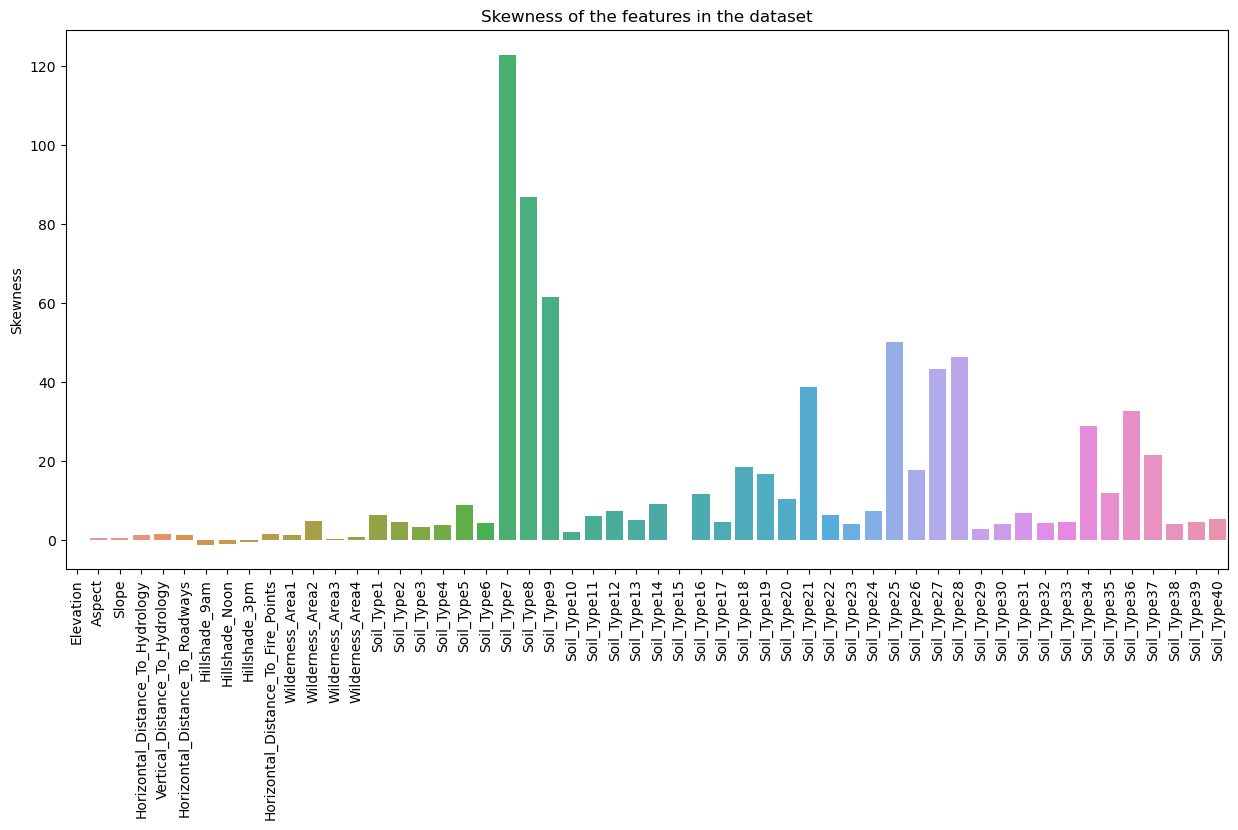

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
plt.title('Skewness of the features in the dataset')
var = plt.xticks(rotation=90)

### Class Distribution
Now we will look at the class distribution for `Cover_Type` by grouping it and calculating total occurrence.


We can see that `Cover_Type` has an equal distribution.

In [14]:
df.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

# Feature Visualization
In this section we will visualize the spread and outliers of the data of numerical features.

### Histogram #1: Numerical Features Inferences
- In conclusion, it seems all continuous numerical features are not normally distributed.
- `Slope`,`Horizontal_Distance_To_Hydrology`,`Vertical_Distance_To_Hydrology`,`Horizontal_Distance_To_Roadways`,
`Horizontal_Distance_To_Roadways`, and `Horizontal_Distance_To_Fire_Points` are **right skewed**.
- `Elevation`,`Hillshade_9am`,`Hillshade_3pm` are **left skewed**.

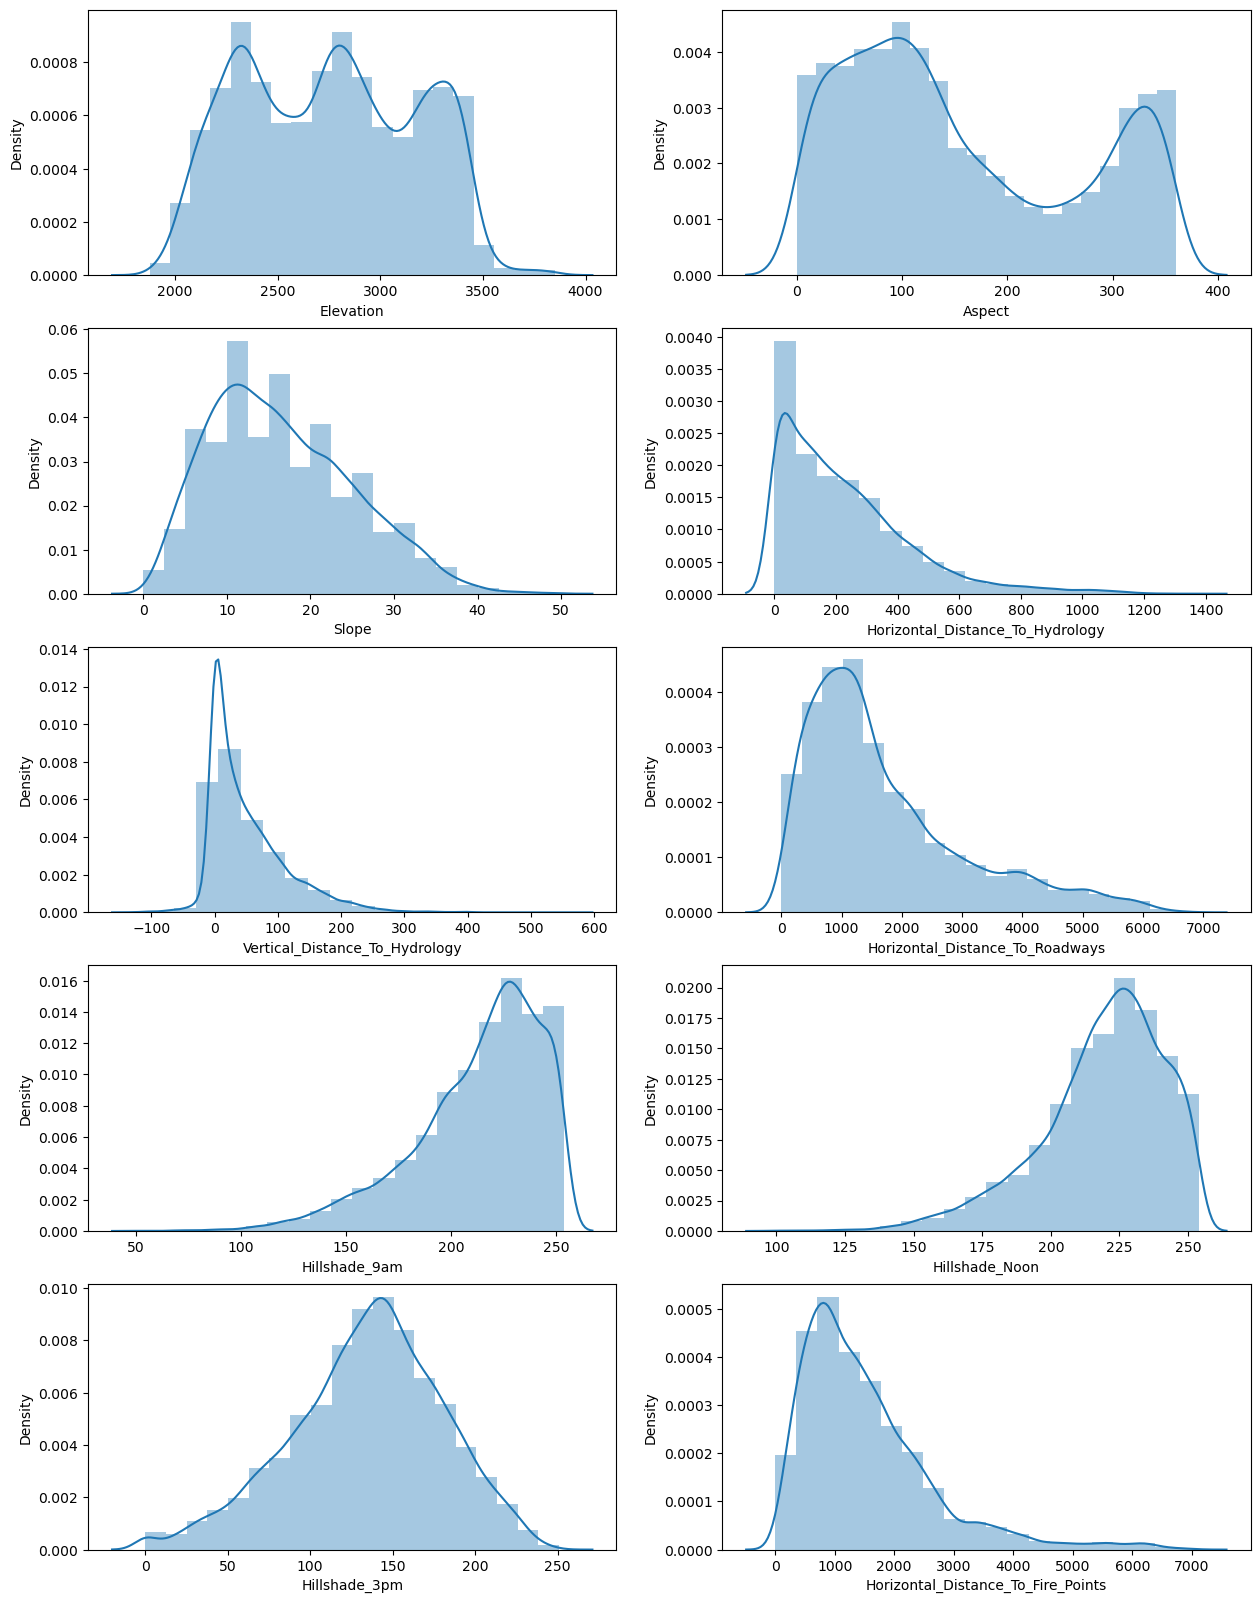

In [15]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(df.Elevation, bins=20, ax=ax[0,0])
sns.distplot(df.Aspect, bins=20, ax=ax[0,1])
sns.distplot(df.Slope, bins = 20, ax=ax[1,0]) 
sns.distplot(df.Horizontal_Distance_To_Hydrology, bins = 20, ax=ax[1,1])
sns.distplot(df.Vertical_Distance_To_Hydrology, bins = 20, ax=ax[2,0]) 
sns.distplot(df.Horizontal_Distance_To_Roadways, bins = 20, ax=ax[2,1]) 
sns.distplot(df.Hillshade_9am, bins = 20, ax=ax[3,0]) 
sns.distplot(df.Hillshade_Noon, bins = 20, ax=ax[3,1])
sns.distplot(df.Hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(df.Horizontal_Distance_To_Fire_Points, bins = 20, ax=ax[4,1])
plt.show()

# Feature Distribution
Now we will plot how `Wilderness_Area` and `Soil_Type` are distributed.

### Barplot 2: Number of Observations of Wilderness Areas Inferences:
- Visually, we can see that `Wilderness_Area3` and `Wilderness_Area4` has the most presence.
- `Wilderness_Area2` has the least amount of observations. Which confirms it will not have the most presence in our data.

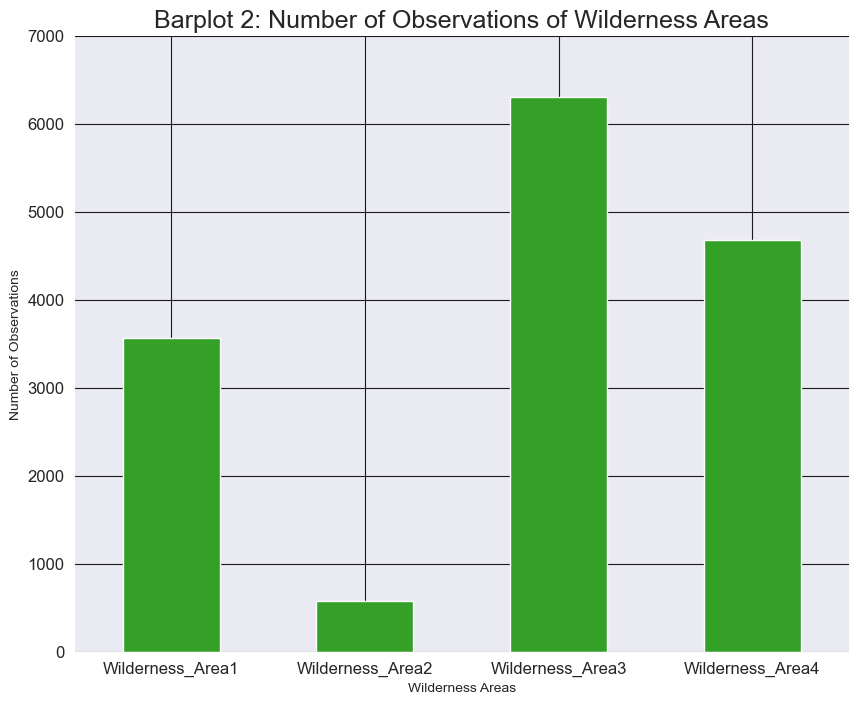

In [16]:
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]

sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

palette = sns.color_palette(flatui)

wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('Barplot 2: Number of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas')
plt.ylabel('Number of Observations')
plt.ylim([0,7000])
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

Percentage of each wilderness area

Text(0.5, 1.0, 'Percentage of Observations of Wilderness Areas')

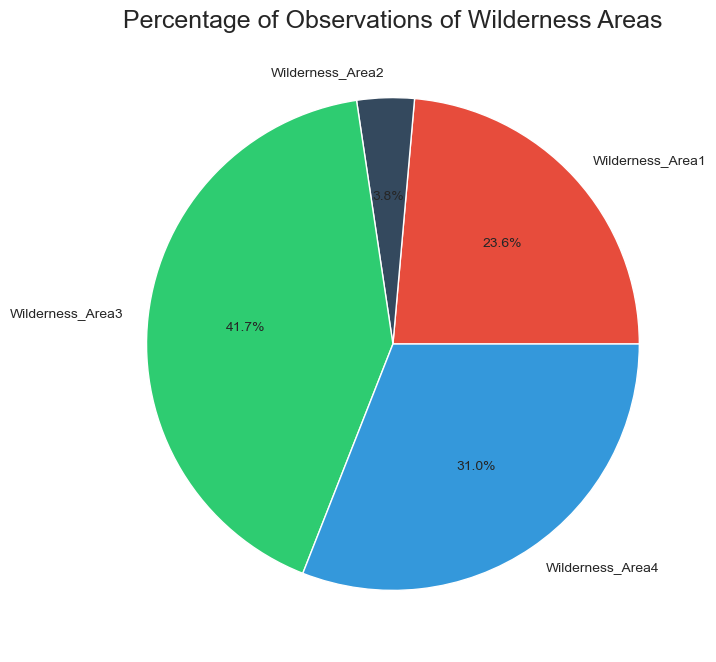

In [17]:
wild_data.sum().plot(kind='pie', figsize=(10,8), autopct='%1.1f%%', colors=flatui)

plt.title('Percentage of Observations of Wilderness Areas', size=18)

Total count of each wilderness area

In [18]:
wild_data.sum()

Wilderness_Area1    3568.0
Wilderness_Area2     569.0
Wilderness_Area3    6302.0
Wilderness_Area4    4681.0
dtype: float64

### Barplot 3: Number of Observations of Soil Type Inferences:

This section presents a bar plot illustrating the frequency of each `Soil Type`.
- The bar plot reveals a variety of distribution patterns among the soil types, including **normal, bimodal, unimodal, and both left & right-skewed distributions**.
- The highest frequency is observed in `Soil_Type10`, followed by `Soil_Type29`.
    - Statistical analysis indicates that `Soil_Type10` appears in 13.9% of the dataset's observations.
    - Interestingly, `Soil_Type10` exhibits the least skewness among all soil types, as noted in our preliminary data exploration.
- The least frequent soil types are `Soil_Type15` and `Soil_Type7`.
    - These particular soil types are characterized by extreme skewness due to their rarity, resulting in a distribution that is heavily concentrated near 0 with a prolonged tail extending to the right. This is indicative of a **positively skewed distribution** or **right skewed distribution**, as elaborated in the *Feature Skew* Section.


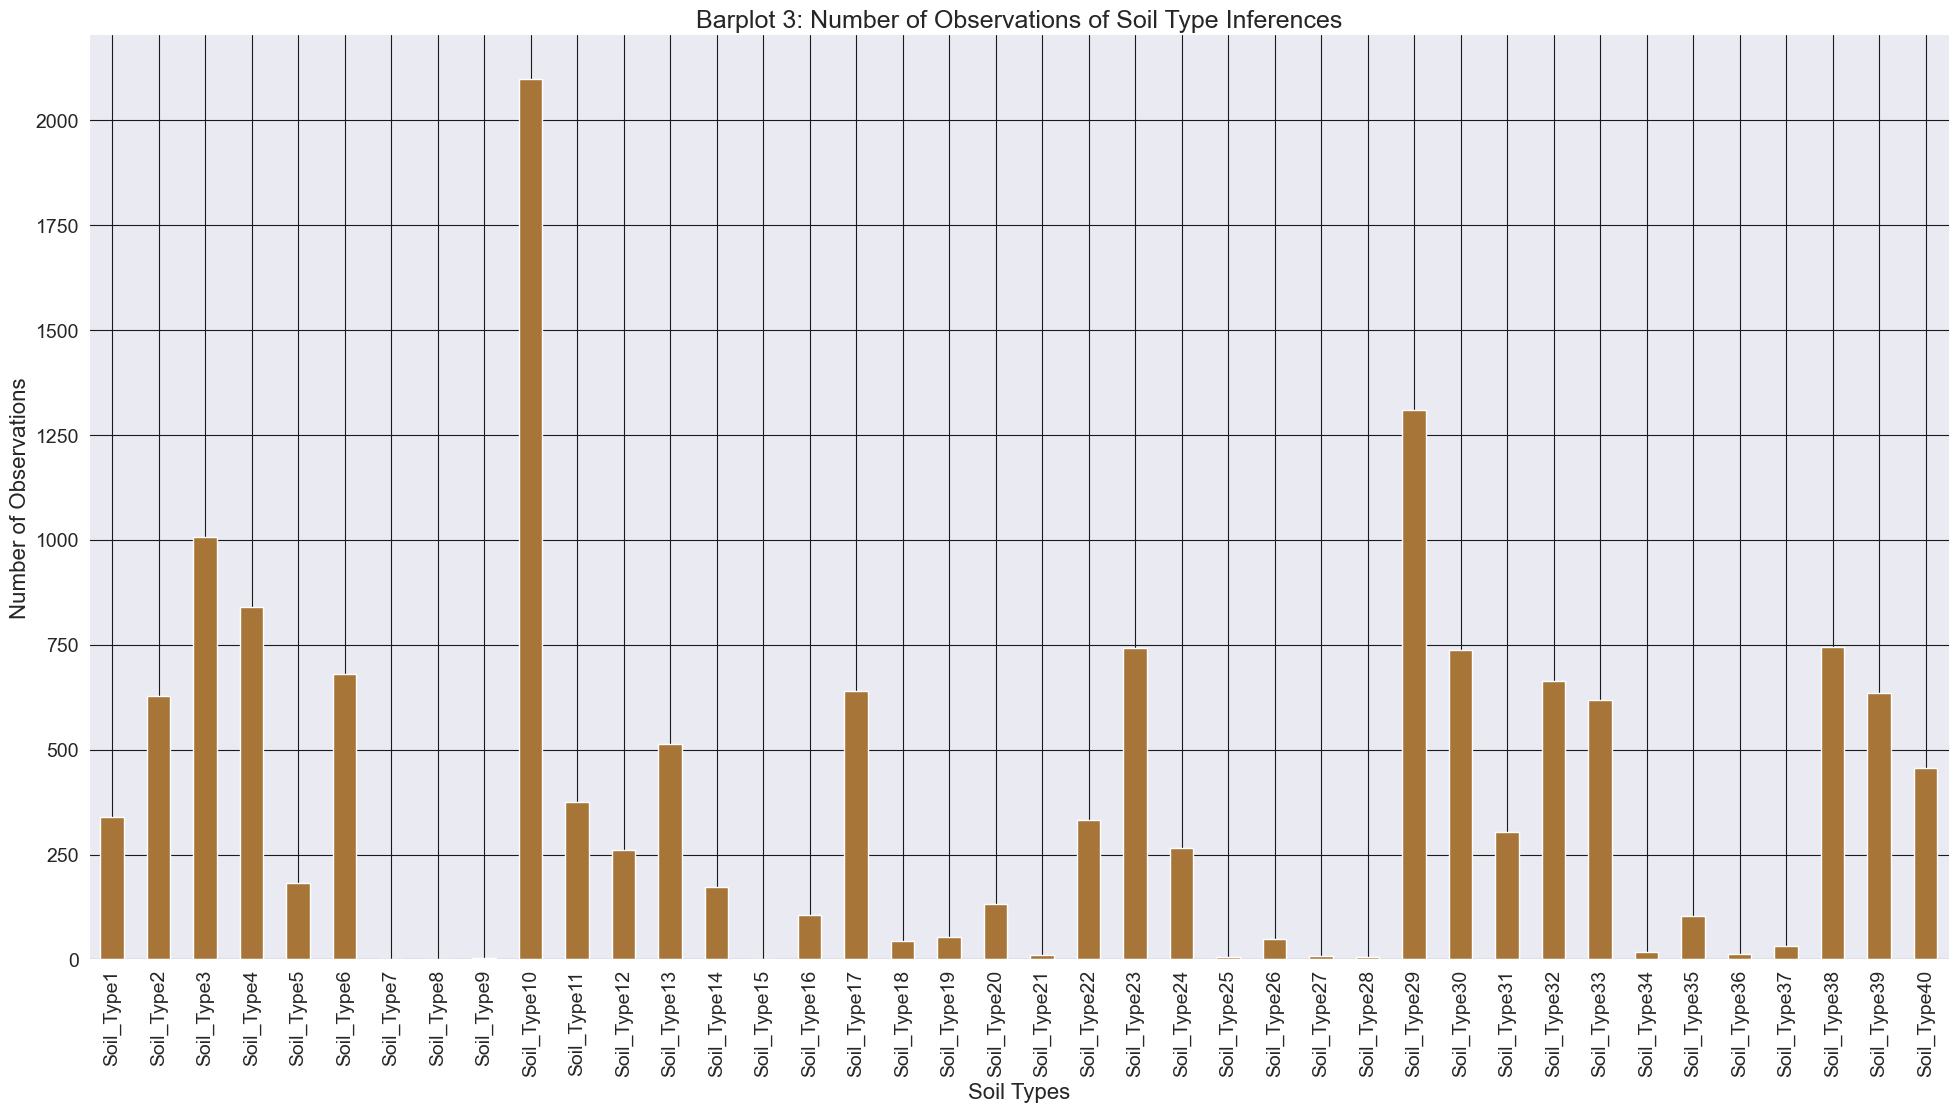

In [19]:
sns.set_style("darkgrid", {'grid.color': '.1'})

soil_data.sum().plot(kind='bar', figsize=(24,12), color='#a87539')
plt.title('Barplot 3: Number of Observations of Soil Type Inferences', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('Number of Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

Presence in percentage of soil_type_10

In [20]:
soil_data['Soil_Type10'].sum() / soil_data.shape[0] * 100

13.862433862433862

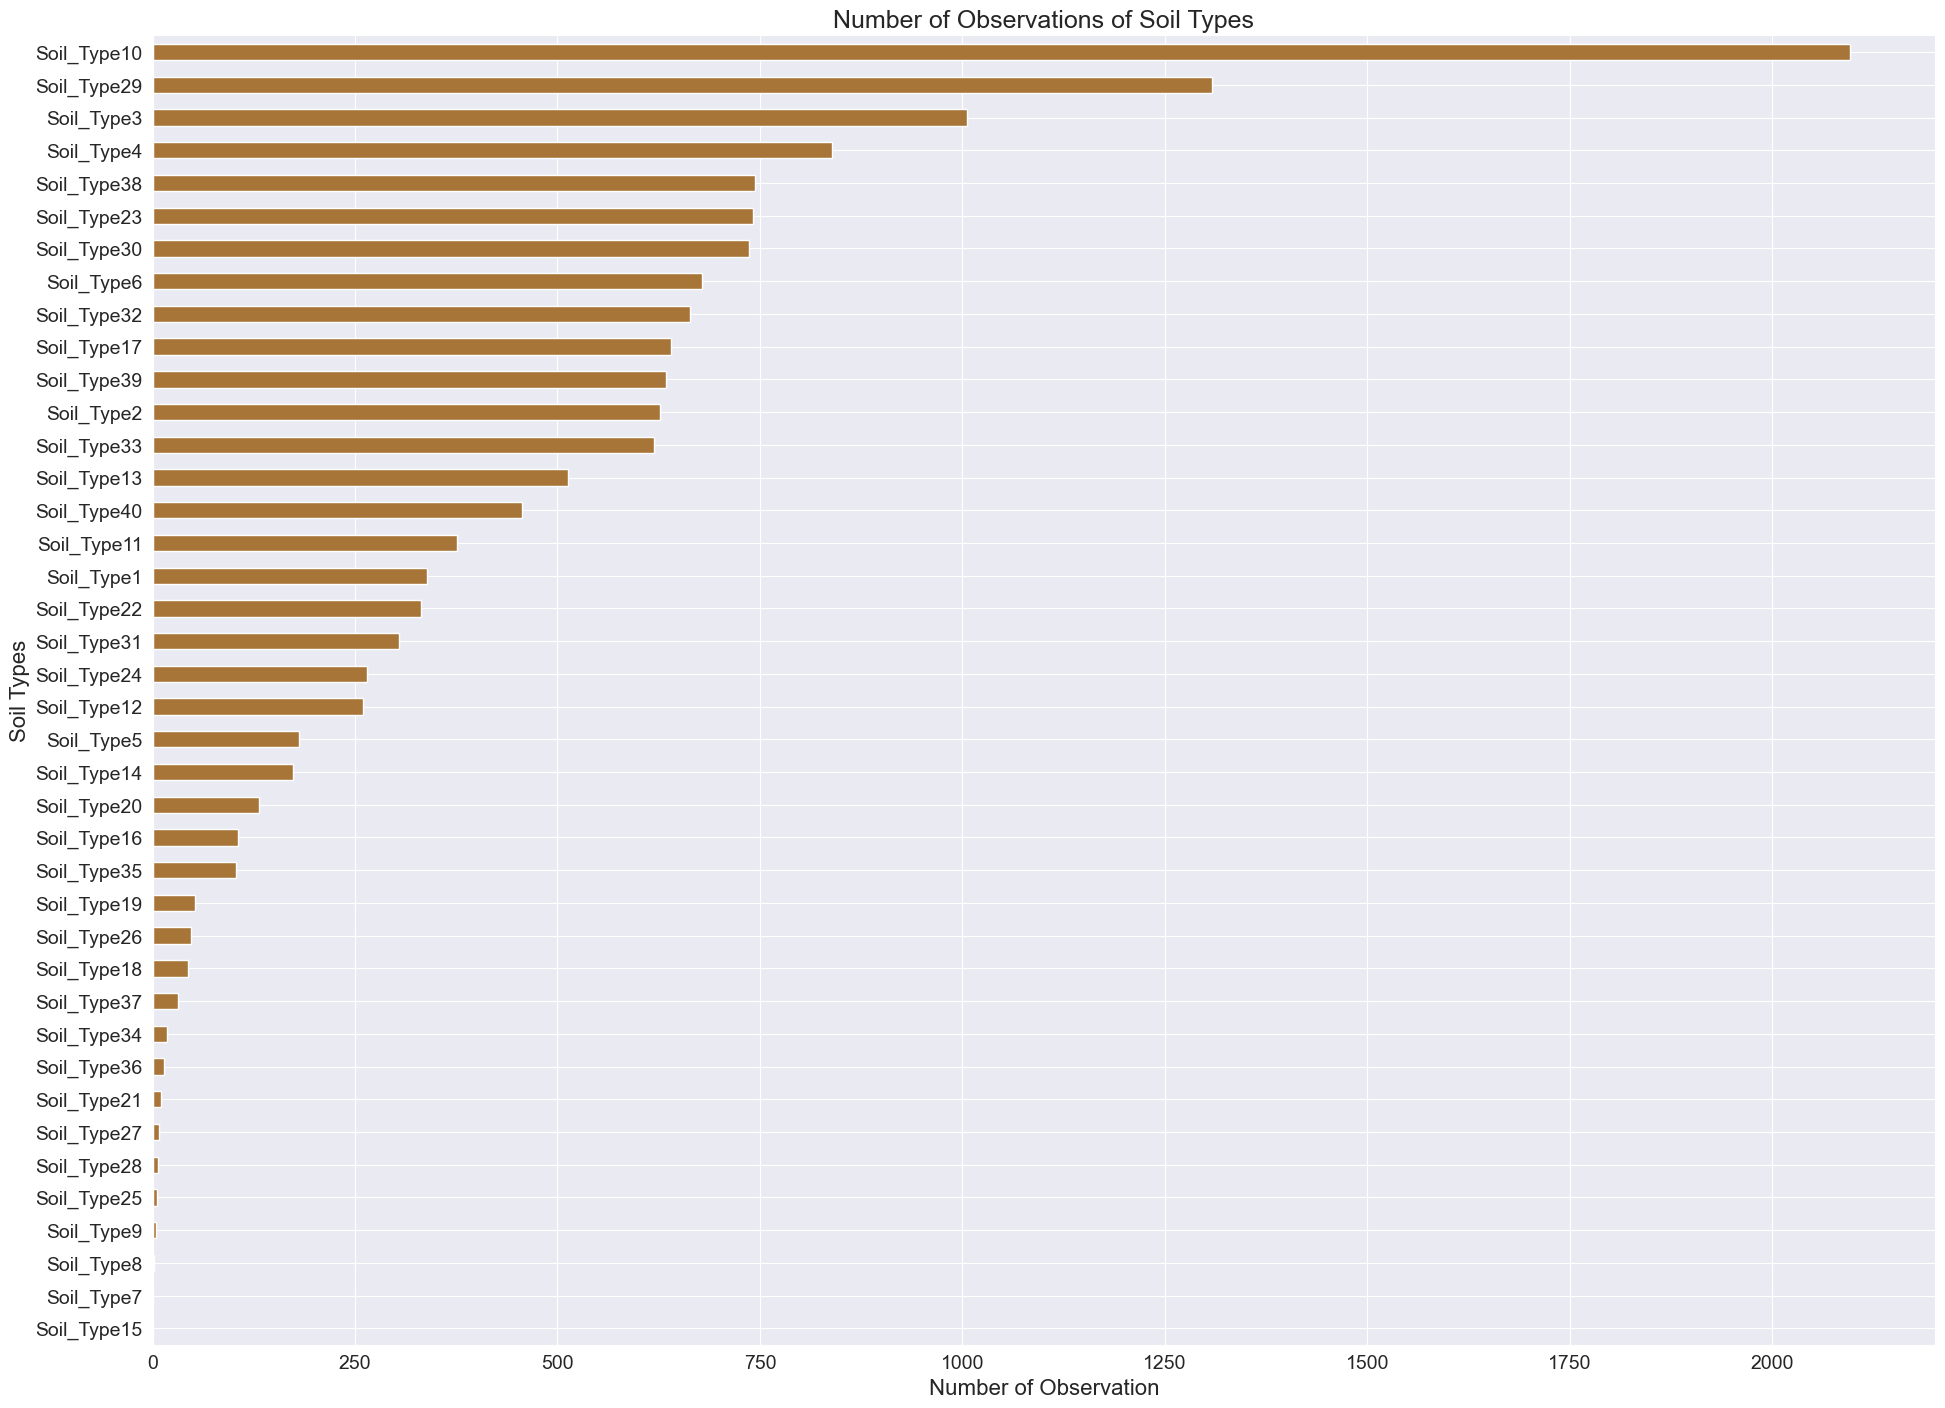

In [21]:
sns.set_style("darkgrid", {'grid_color': '.1'})

soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('Number of Observations of Soil Types', size=18)
plt.xlabel('Number of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

# Feature Comparison
We will next examine how each feature in our dataset correlates with the target variable. This analysis will illustrate the density and distribution of each class of the target variable in relation to the features.

### Violin Plot 4.1 Insights on Numerical Features:
- **Elevation**
    - Within the elevation range of 2000m to 2500m, `Cover_Type4` exhibits the highest forest coverage.
    - Conversely, `Cover_Type3` is least commonly found at similar elevations.
    - Trees in the `Cover_Type7` category are generally found at higher elevations, from approximately 2800m up to 3800m.
        - The highest recorded elevation falls under `Cover_Type7`.
        - Given its unique distribution across different forest cover types, elevation is a key feature for our analysis, potentially offering valuable insights for our predictive model.
- **Aspect**
    - The aspect feature shows a normal distribution across all classes.
- **Slope**
    - Compared to other features, slope values are lower as they are measured in degrees, similar to the aspect feature but with notably lower maximum values. `Cover_Type2` appears to have the lowest slope values.
    - The majority of slope observations for all classes fall between 0-20 degrees.
- **Horizontal_Distance_To_Hydrology**
    - Exhibits a right or positive skew, with most values for all classes concentrated in the 0-50m range.
- **Vertical_Distance_To_Hydrology**
    - This feature also displays a positive skew, but with values closer to 0 for the majority of observations across all classes.
    - `Cover_Type2` not only has the highest observation for this feature but also the broadest range, highlighting its significant variance among classes.
- **Hillshade_9am** and **Hillshade_Noon**
    - Both features are negatively skewed, mostly ranging between 200-250 index values for most class observations.
- **Hillshade_3pm**
    - Displays a normal distribution across all classes, indicating a uniform spread of data.


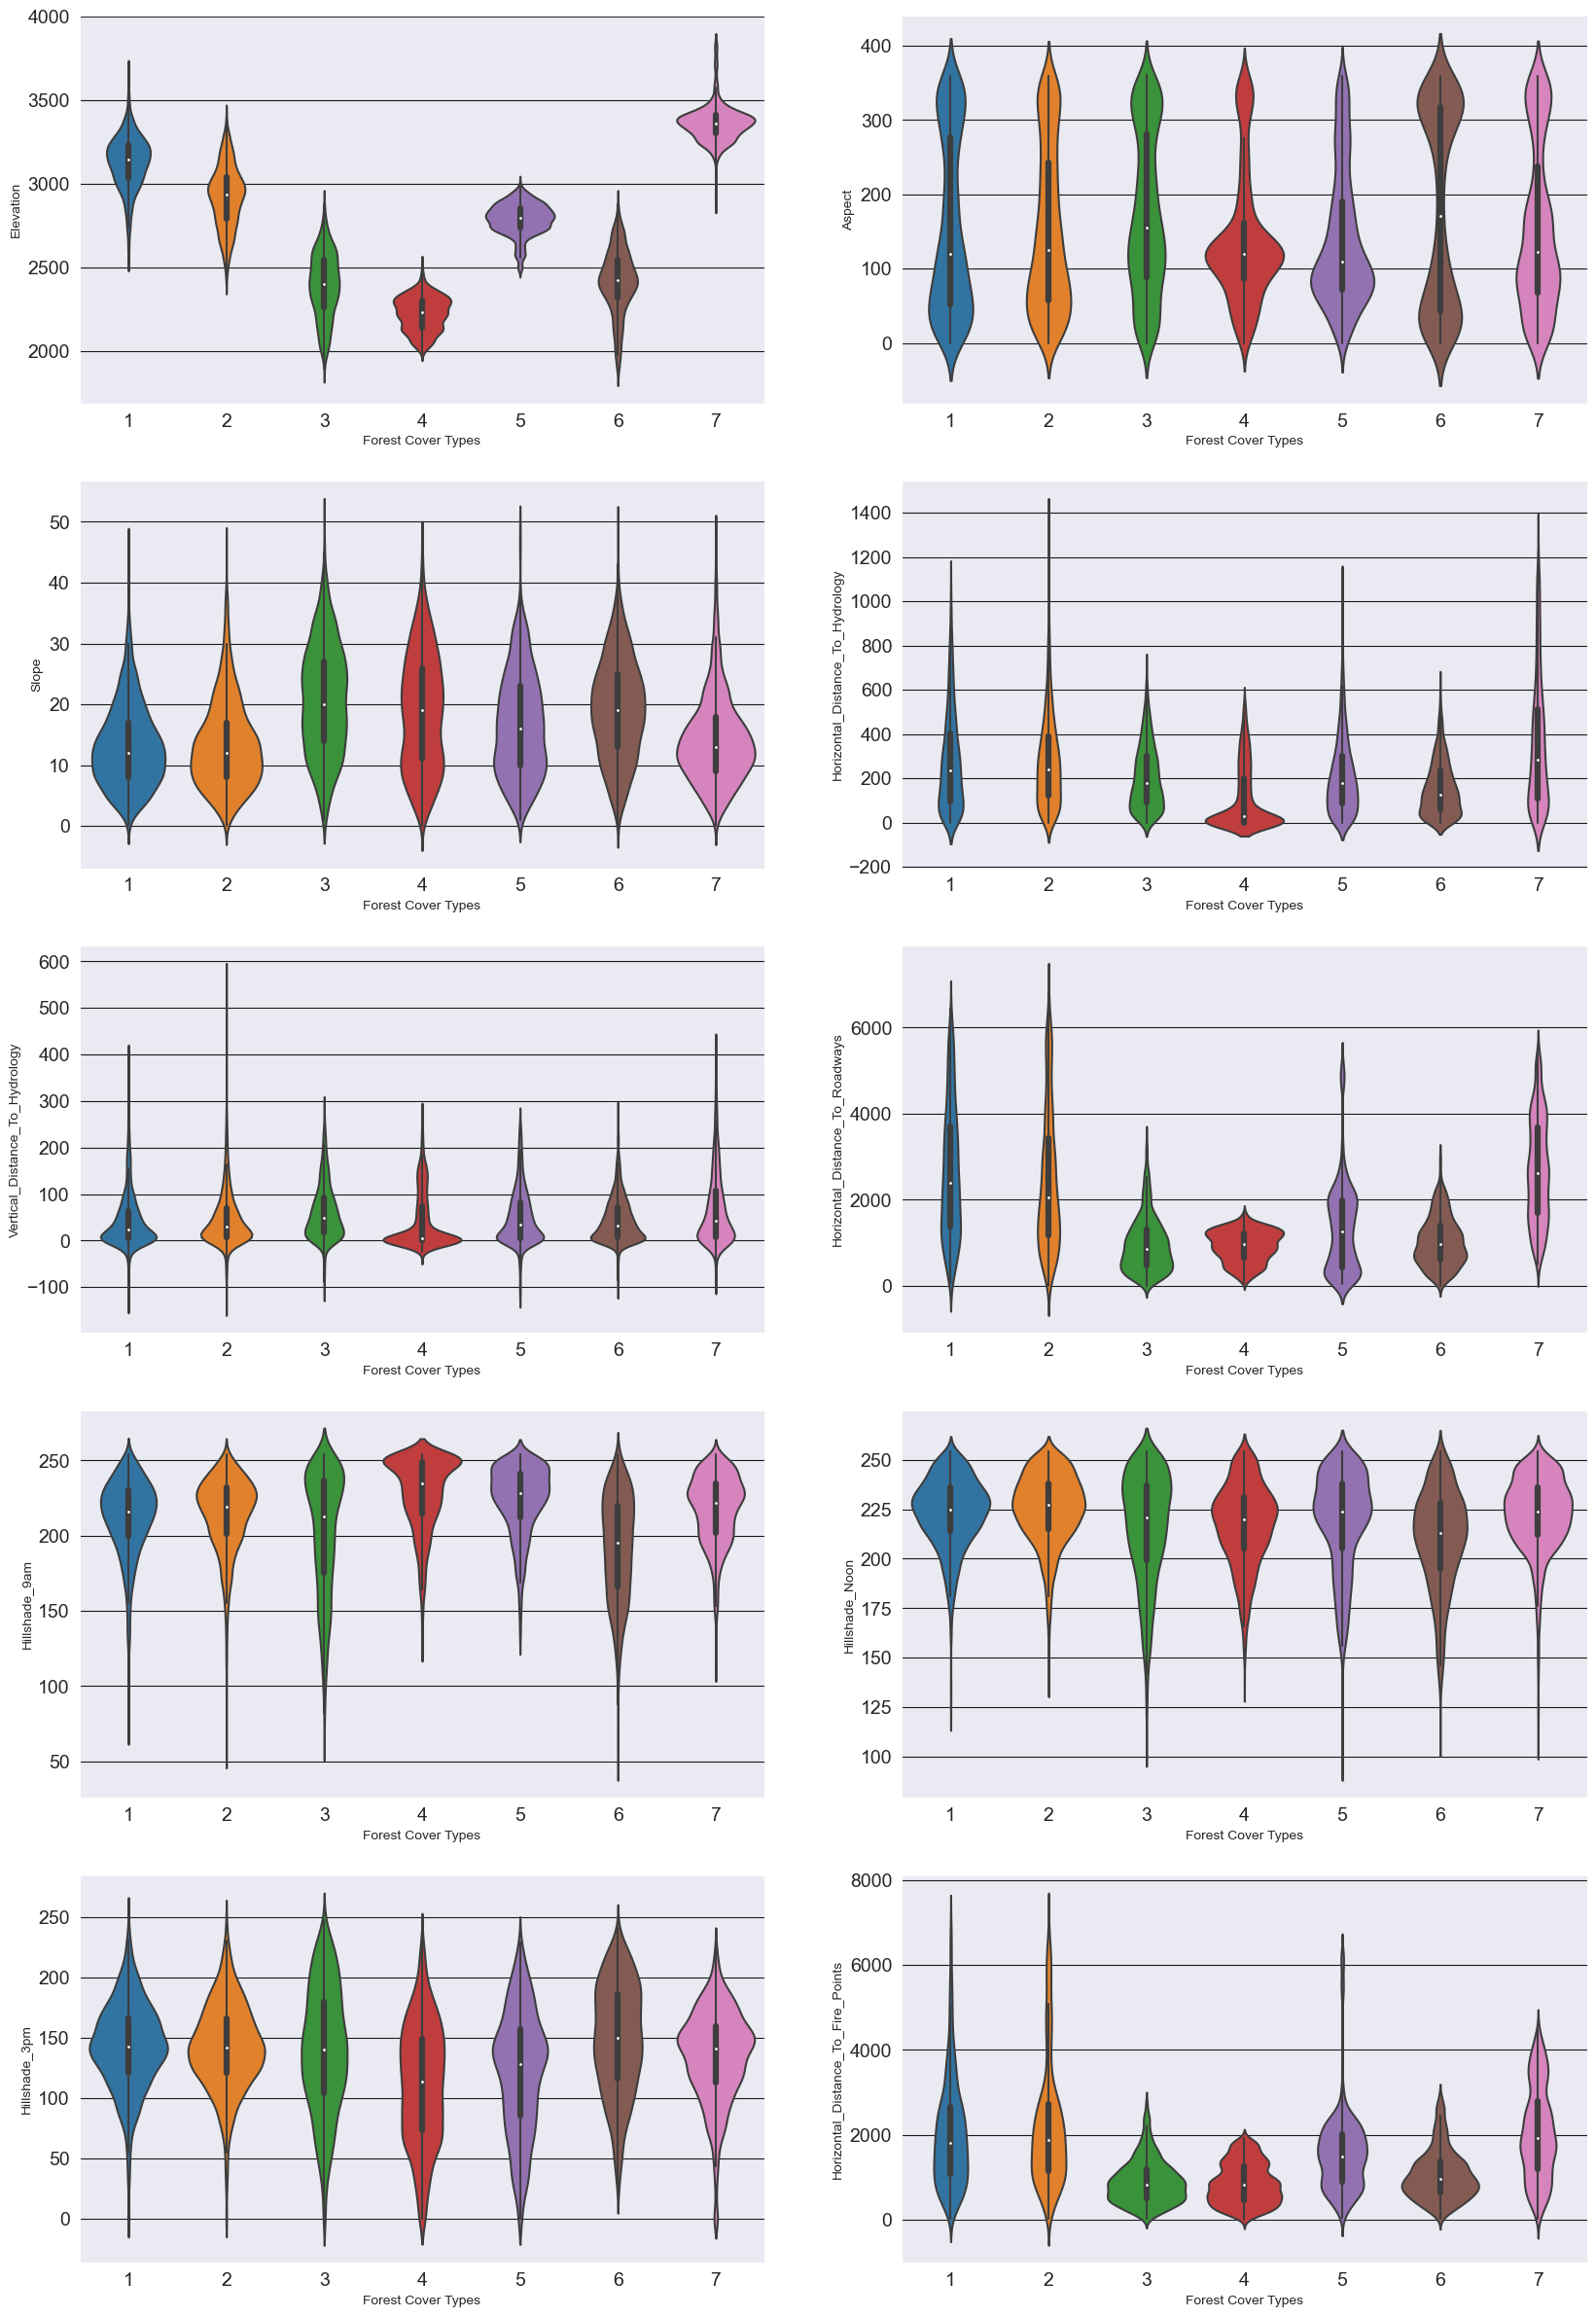

In [22]:
sns.set_style("darkgrid", {'grid.color': '.1'})

target = df['Cover_Type']

features = num_features.columns

plt.figure(figsize = [20,30])

for i in range(0, len(features)):
    plt.subplot(5,2,1+i)
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types')
    plt.ylabel(features[i])

plt.show()

### Barplot 4.2 Distribution of `Wilderness_Area` by `Cover_Type` Inferences:
- `Wilderness_Area1` belongs to forest `Cover_Type1`, `Cover_Type2`, `Cover_Type5`, and `Cover_Type7`.
- `Wilderness_Area2` belongs to forest `Cover_Type1`, and `Cover_Type2`.
- `Wilderness_Area3` belongs to all classes except `Cover_Type4`.
- `Wilderness_Area4` belongs to forest `Cover_Type2`, `Cover_Type3`, `Cover_Type4`, and `Cover_Type6`.
- Overall `Wilderness_Area2` has these least amount of Cover_Type observations out of all Wilderness Areas.

In [23]:
cols = df.columns
r,c = df.shape

Create a new dataframe with r rows, one column for each encoded category [Wilderness_Area(1-4),Soil_type(1-40)], and target in the end


In [24]:
new_train = pd.DataFrame(index= np.arange(0,r), columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'])

In [25]:
# make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0
    q = 0
    # wilderness_area range
    for j in range(10,14):
        if (df.iloc[i,j] == 1):
            p = j-9
            break
    # soil_type range
    for k in range(14,55):
        if (df.iloc[i,k] == 1):
            q = k-13
            break
    # make entry in data for each r
    new_train.iloc[i] = [p,q,df.iloc[i, c-1]]

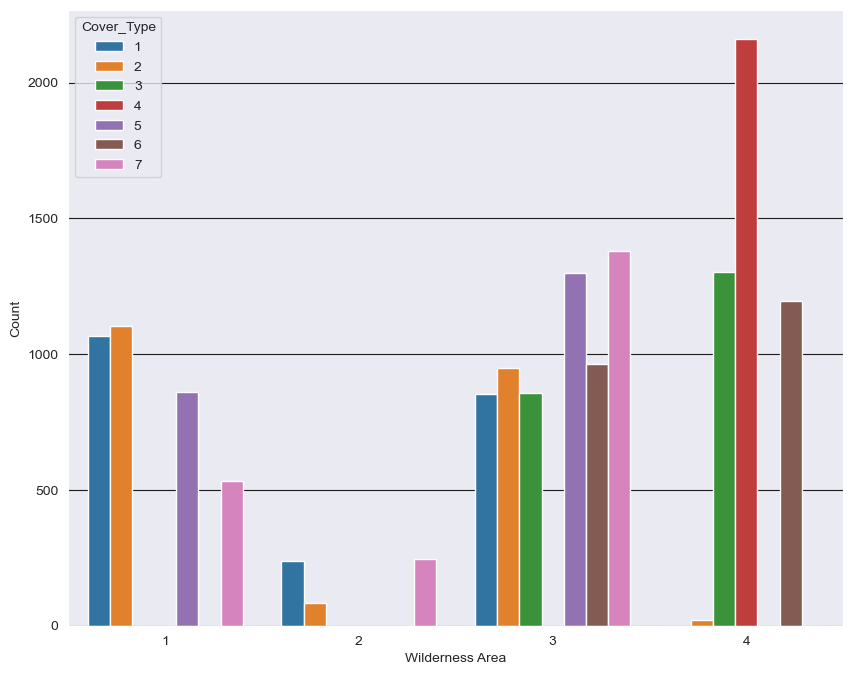

In [26]:
# plot wilderness_area by cover_type
plt.figure(figsize = [10,8])
sns.countplot(x='Wilderness_Area', hue='Cover_Type', data=new_train)
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

### BarPlot 4.3 Understanding `Cover_Type` Distribution Among `Wilderness_Areas`:
**Inferences:**
- `Cover_Type1,2,7` mostly found in `Wilderness_Area1,2, and 3`.
- It is likely to find `Cover_Type3` in `Wilderness_Area4` rather than other areas.
- `Cover_Type4` seems to be found only in `Wilderness_Area4`.
- `Cover_Type5` is most likely will come from`Wilderness_Area1,3`.
- `Cover_Type3,6` are found in `Wilderness_Area3,6`.

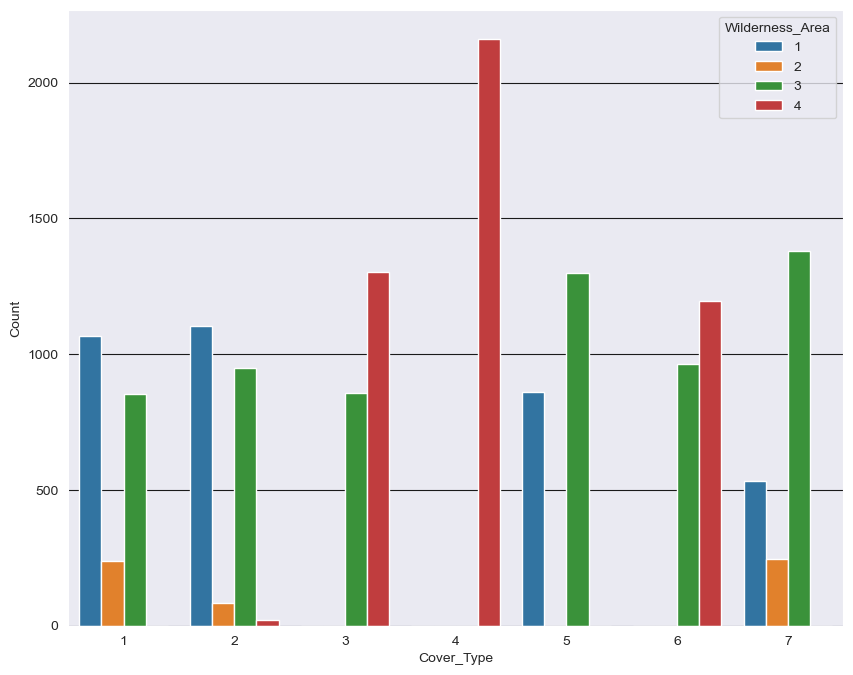

In [27]:
plt.figure(figsize = [10,8])
sns.countplot(x='Cover_Type', hue='Wilderness_Area', data=new_train)
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

### BarPlot 4.4 Distribution of Cover Type by Soil Type 
**Inferences:**
- `Soil_Type4` is the only soil type that has presence in all forest cover types.
- `Soil_Type`: 7 and 15 visually, have little to no presence in all forest cover types.
- `Soil_Type`: 3 and 6 has presence in `Cover_Type`: 2, 3, 4, 6
- `Soil_Type3` has the most presence in `Cover_Type4`.
- `Soil_Type10` has the most presence in `Cover_Type6`.
- `Soil_Type`: 10, 11, 16, and 17 and has presence in `Cover_Type` 1 thru 6.
- `Soil_Type`: 23, 24, 31 and 33 has presence in `Cover_Type`: 1, 2, 5, 6, 7.
- `Soil_Type`: 29 and 30, has presence in `Cover_Type`: 1, 2, 5, 7.
- `Soil_Type`: 22, 27, 35, 38, 39, and 40 has presence in `Cover_Type`: 1, 2, and 7.
- `Soil_Type`: 18 and 28 has presence in `Cover_Type`: 2 and 5.
- `Soil_Type`: 19 and 26 has presence in `Cover_Type`: 1, 2, and 5.
- `Soil_Type`: 8 and 25 has presence in only `Cover_Type2`.
- `Soil_Type`: 1, 5, and 14 has presence in `Cover_Type`: 3, 4, and 6.
- `Soil_Type37` has presence in `Cover_Type7`.


- `Cover_Type4` has the least amount of `Soil_Type` count.
- `Cover_Type2` has the most presence in `Soil_Type` count.

In [28]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

In [29]:
st_by_ct = pd.crosstab(new_train['Cover_Type'], new_train['Soil_Type'])

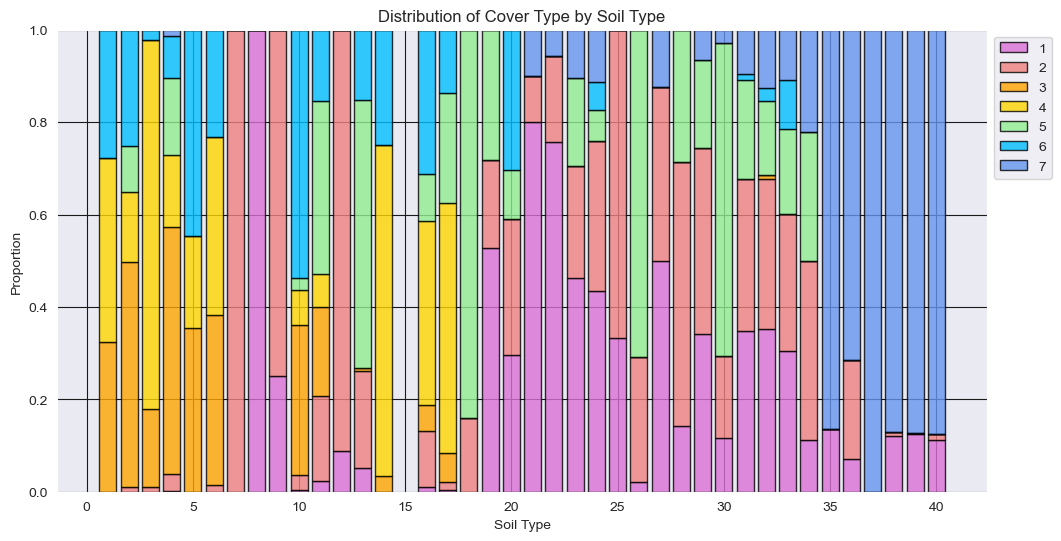

In [30]:
st_by_ct_props = st_by_ct/np.sum(st_by_ct)
bb = np.cumsum(st_by_ct_props) - st_by_ct_props

plt.figure(figsize = [12,6])
for row_indx in range(len(st_by_ct_props)):
    plt.bar(st_by_ct_props.columns.values,
            st_by_ct_props.iloc[row_indx].values,
            bottom = bb.iloc[row_indx].values,
            color = palette[row_indx],
            alpha = 0.8,
            edgecolor = 'black',
            label = st_by_ct_props.index[row_indx]
            )
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.show()

# Feature Correlation
Part of our data is binary. A **correlation matrix** requires continuous data, so we will exclude binary data.


- Features that less or no correlation will be indicated by the color **black**.
- Features with positive correlation are colored **orange**.
- Features with negative correlation are colored **blue**.


### Correlation Plot 5 
**Inferences:**
- `Hillshade_3pm` and `Hillshade_9am` show a high negative correlation.
- `Hillshade_3pm` and `Aspect` show a high positive correlation.
- `Hillshade_3pm` and `Aspect` also had the most normal distribution compared to forest cover type classes (**Plot 4.1**)
- The following pairs had a positive correlation:
    - `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology`
    - `Horizontal_Distance_To_Roadways` and `Elevation`
    - `Hillshade_3pm` and `Aspect`
    - `Hillshade_3pm` and `Hillshade_Noon`
- The following pairs had a negative correlation:
    - `Hillshade_9am` and `Aspect`
    - `Hillshade_Noon` and `Slope`
- The following pair has no correlation:
    - `Hillshade_9am` and `Horizontal_Distance_To_Roadways`
- The least correlated value tells us that each feature has different valuable information that could be important features for predictions.

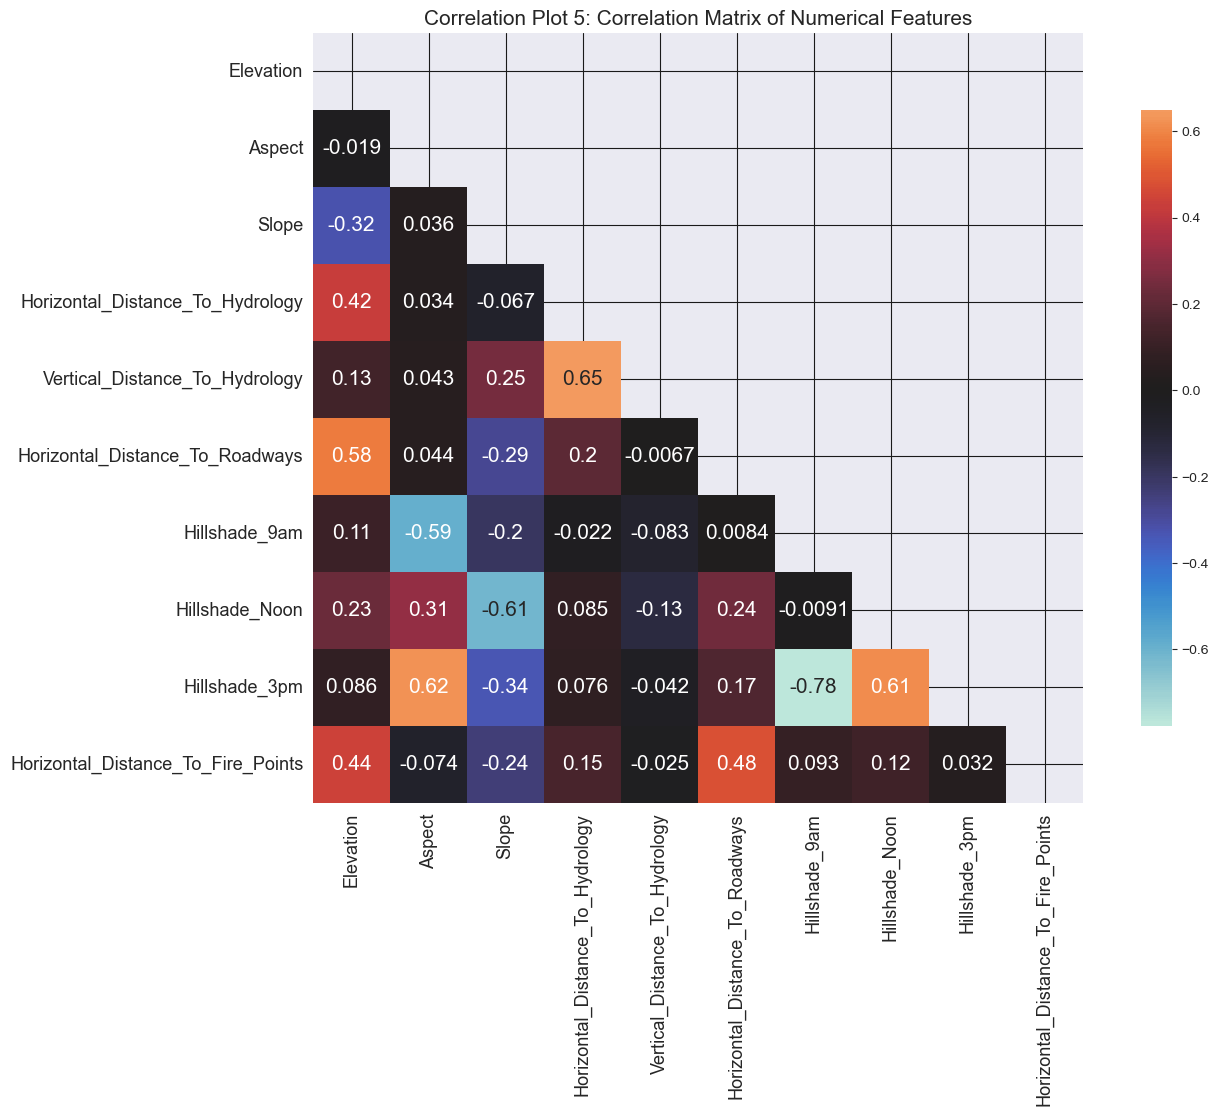

In [31]:
plt.subplots(figsize=(15,10))

num_features_corr = num_features.corr()

mask = np.zeros_like(num_features_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.title('Correlation Plot 5: Correlation Matrix of Numerical Features', size=15)
plt.show()

### Scatterplot 6 Features with correlation greater than 0.5
Let's look at the paired features with correlation greater than 0.5. These will be the feature pairs with a positive correlation.

**Inferences:**
- `Hillshade_3pm` and `Aspect` represent a **sigmoid function** relationship. The data points at the boundaries mostly belong to `Cover_Type`: 3, 4, 5.
- `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology` represent a **linear function** but more spread out.
    - `Cover_Type`: 1, 2, 7 have more observations spreaded out.
    - `Cover_Type`: 3, 4, 5, 6 are mode densely packed from 0-600m Horizontal_Distance_To_Hydrology
- `Elevation` and `Horizontal_Distance_To_Roadways` is a spread out **linear function**.
    - `Cover_Type` 1, 2, and 7 has the highest elevation and a widespread of points from 0m to ~7000m `Horizontal_Distance_To_Roadways`
    - `Cover_Type` 4 and 6 have a densed dataset where there is both low elevation and horizontal distance to roadways in meters.
- `Hillshade_Noon` and `Hillshade_3pm`
    - `Cover_Type` 1, 2, 6 and 7 have a higher hillshade index at noon and 3pm.
    - `Cover_Type` 4 and 5 have a lower hillshade index at noon and 3pm.

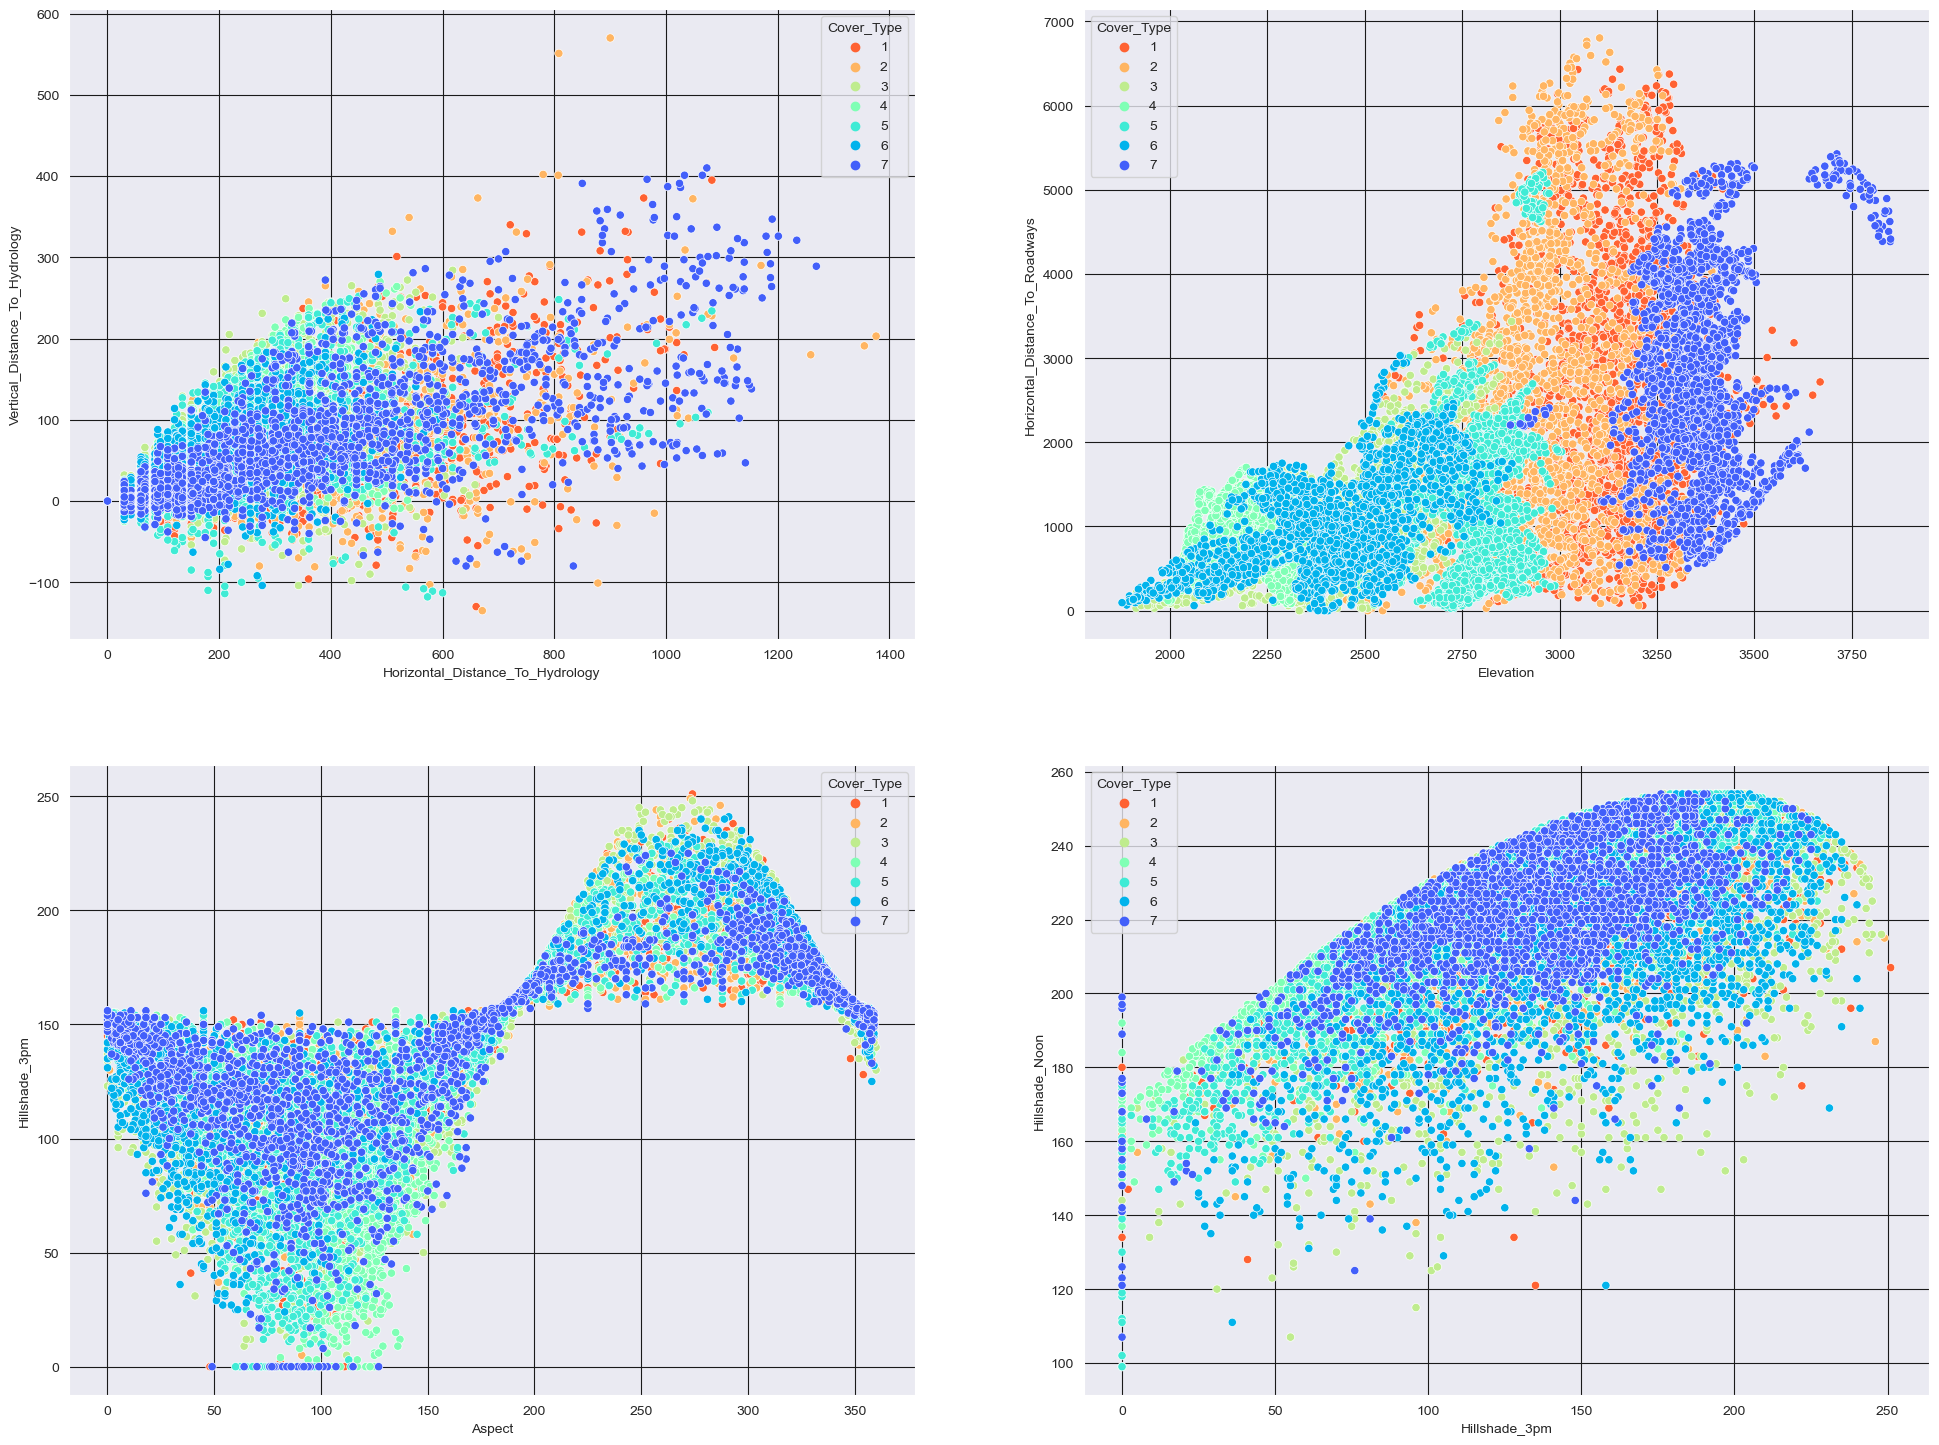

In [32]:
fig, ax = plt.subplots(2,2, figsize=(24,18))

sns.scatterplot(data=df, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=df, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=df, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=df, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

### Top Correlated Features by `Cover_Type` by **One-Hot encoding**
This heatmap of the top correlated features is a great transition into how these original features can be engineered to better predict the forest cover type in the future models.

In [33]:
class_dict = {
    1:'Spruce/Fir',
    2:'Lodgepole Pine',
    3:'Ponderoas Pine',
    4:'Cottonwood/Willow',
    5:'Aspen',
    6:'Douglas-fir',
    7:'Krummholz'
}

df['Cover_Type_Name'] = df['Cover_Type'].map(class_dict)

train_updated = pd.concat([df, pd.get_dummies(df['Cover_Type_Name'], prefix='Type')], axis=1)

all_corr = train_updated.corr()

Plot the top correlated features by cover_type

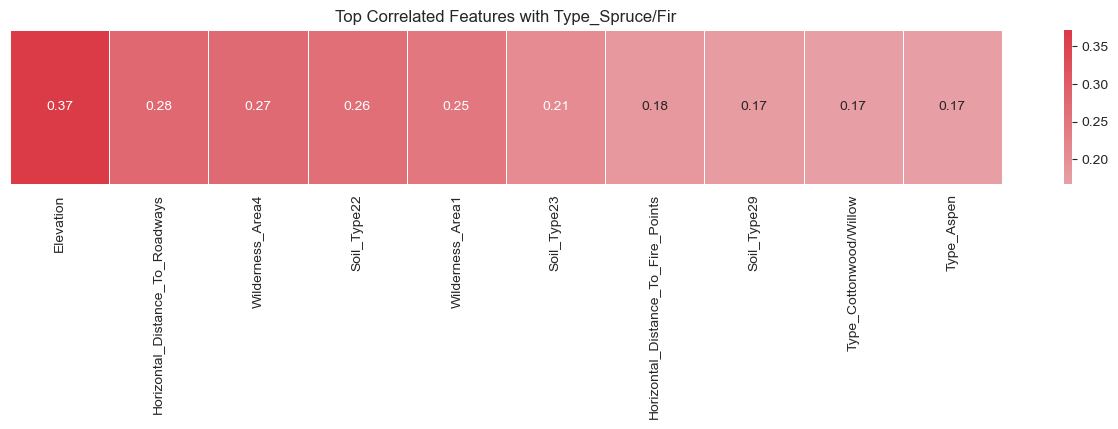

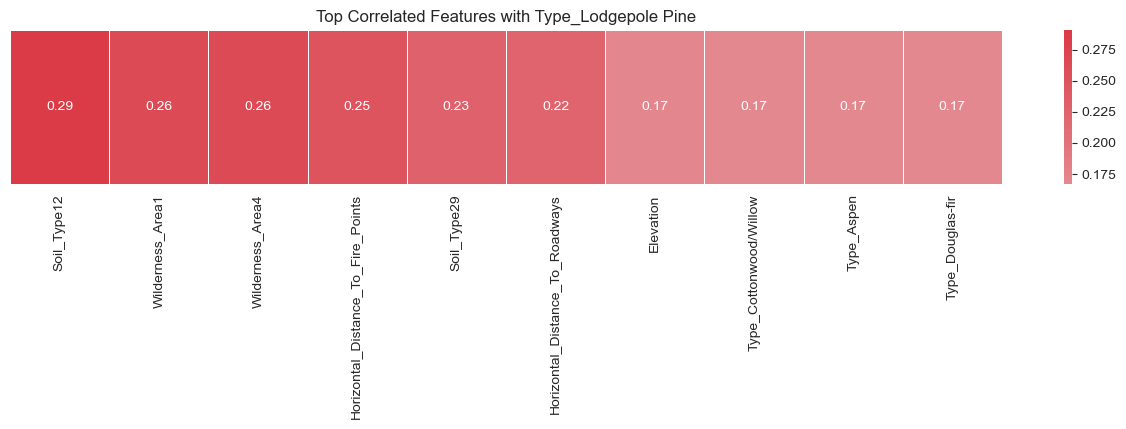

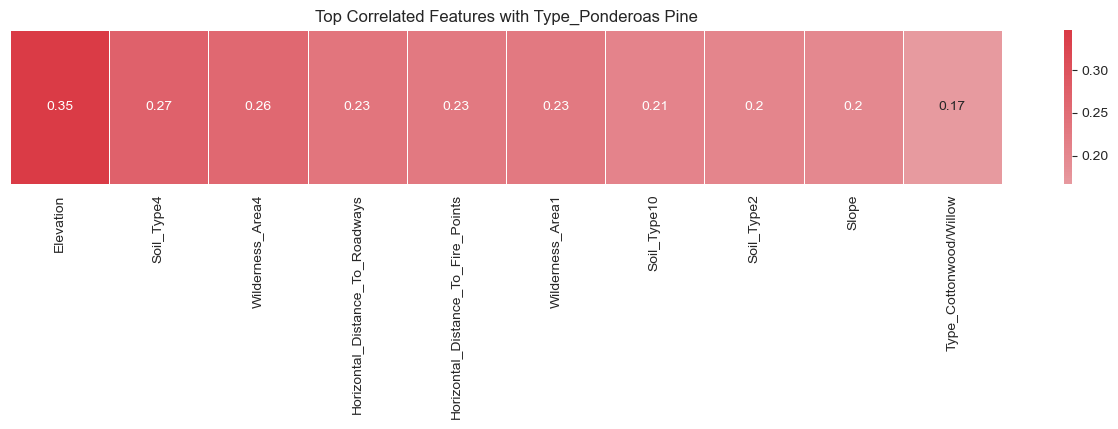

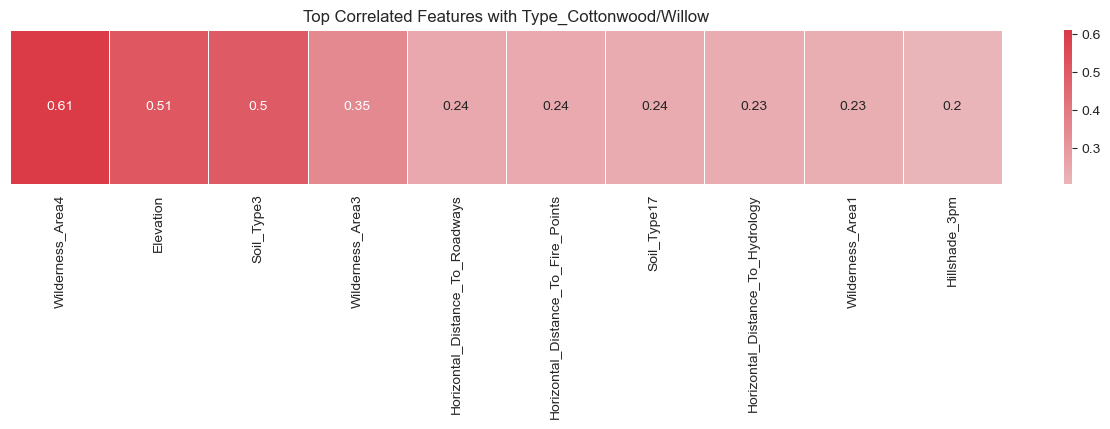

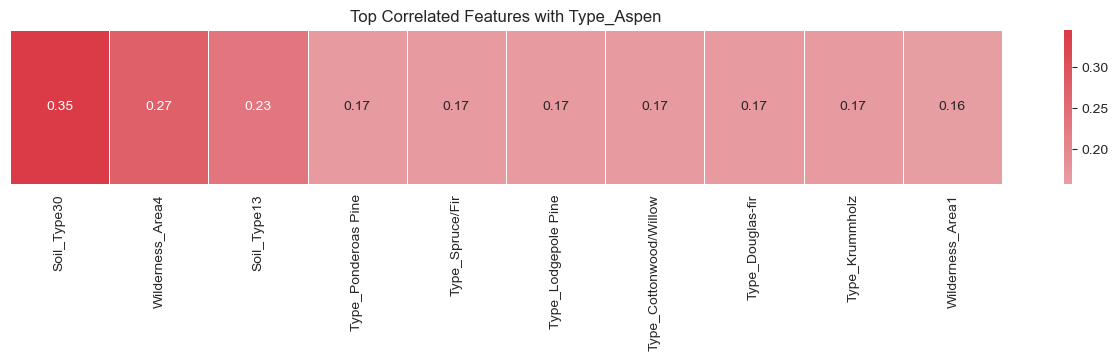

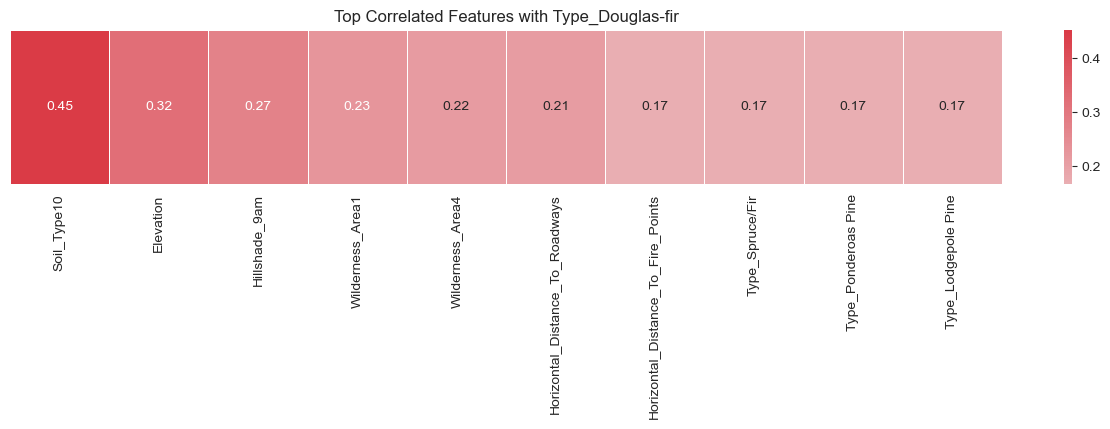

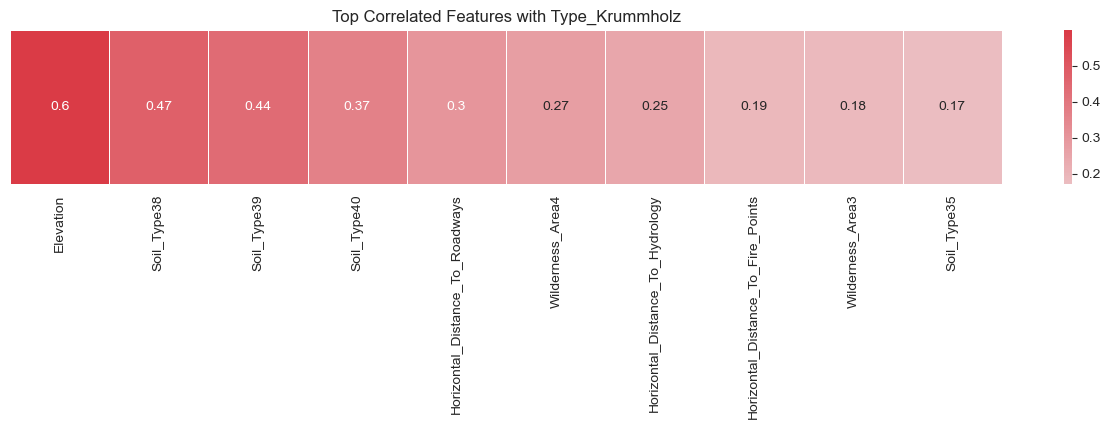

In [34]:
plt.rcParams['figure.figsize'] = [16,2]

for cov in class_dict.values():
    
    cov_str = 'Type_' + cov
    type_corr = all_corr[[cov_str]].apply(abs).sort_values(by=cov_str, ascending=False)
    
    sns.heatmap(type_corr.iloc[1:11,:].transpose(),
                annot = True,
                cmap = sns.diverging_palette(220, 10, as_cmap=True),
                center = 0,
                linewidth = 0.5)
    plt.yticks([])
    plt.title('Top Correlated Features with {}'.format(cov_str)),
    plt.show()

# Further Visualizations: T-SNE, PCA
PCA allows us to reduce the dimensionality of a dataset while preserving the most information in the dataset. It will also allow us to increase the interpretability of the data in the lower dimension and minimize information loss. This section will allow us to do further visualization of the location variables and see if they are more correlated to the target variables.

The location variables `location_vars` are the following:
- `Elevation`
- `Aspect`
- `Slope`
- `Horizontal_Distance_To_Hydrology`
- `Vertical_Distance_To_Hydrology`
- `Horizontal_Distance_To_Roadways`
- `Horizontal_Distance_To_Fire_Points`


In [35]:
location_vars = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                 'Horizontal_Distance_To_Fire_Points']

In [36]:
def fashion_scatter(x, labels):

    """
    Utility function to visualize the output of PCA
    Parameters:
    x: reduced features
    labels: target labels
    """

    num_classes = len(np.unique(labels.values))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    
    for i in range(num_classes):
        index = labels.loc[labels == i + 1].index
        sc = ax.scatter(x[index,0], x[index,1], lw=0, s=30, c=palette[i], label=class_dict[i+1])
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    ax.axis('tight')
    ax

### PCA with 2 Principal Components

Total explained variance ratio (based on 2 components) = 0.95


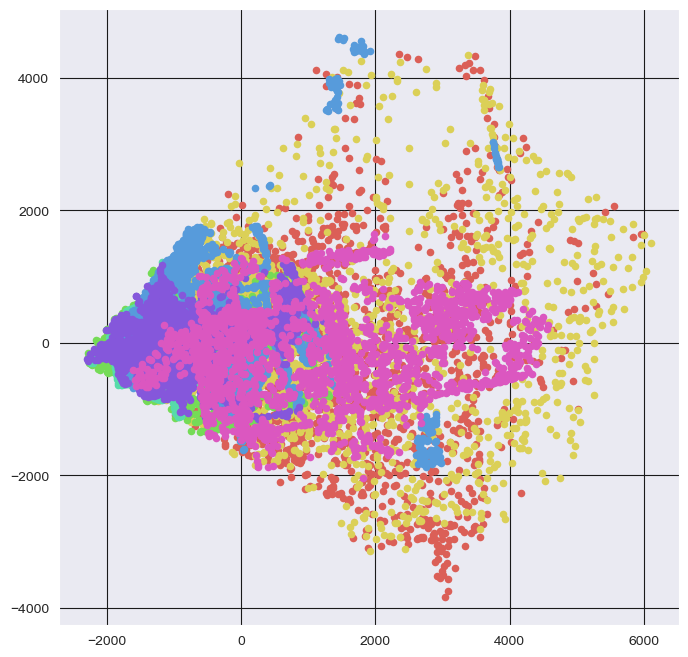

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_updated.loc[:,location_vars])
print("Total explained variance ratio (based on 2 components) = {:.2f}".format(pca.explained_variance_ratio_.sum()))

pca_df = pd.DataFrame(pca_result,columns=['PCA1','PCA2'])
pca_df = pd.concat([pca_df,train_updated['Cover_Type']],axis=1)

fashion_scatter(pca_df.loc[:,['PCA1','PCA2']].values, pca_df['Cover_Type'])